In [2]:
import sys
#Indicate operating environment and import core modules
# location_input = input("what computer are you on? a = Bens, b = gpucluster, c = other   ")
# location_dict = {'a': "C:\\Users\Ben\Documents\GitHub\expression_broad_data", 'b': "/home/heineike/github/expression_broad_data/",'c':'you need to add your location to the location_dict'}
# data_processing_dir = location_dict[location_input]
# print("base directory is " + base_dir)
base_dir = "C:\\Users\\heine\\github\\expression_broad_data"

if sys.path[-1] != base_dir:
    sys.path.append(base_dir)
    print("Added " + base_dir + " to path: " )
    print(sys.path)
import os

print("I am about to import a library")
from core import expression_plots 
from core import io_library 

data_processing_dir = base_dir + os.path.normpath("\expression_data") + os.sep

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import pickle
import subprocess
from collections import Counter
import scipy.stats as stats
#this only works if you are online
online_input = input("are you online? Yes/No")
if online_input == "Yes": 
    import plotly.plotly as py
    py.sign_in('heineike02', 'APPjKrtARaN2ZgUYIkqr')



Added C:\Users\heine\github\expression_broad_data to path: 
['', 'C:\\Users\\heine\\AppData\\Local\\Enthought\\Canopy\\edm\\envs\\bmh_python35_ts\\python35.zip', 'C:\\Users\\heine\\AppData\\Local\\Enthought\\Canopy\\edm\\envs\\bmh_python35_ts\\DLLs', 'C:\\Users\\heine\\AppData\\Local\\Enthought\\Canopy\\edm\\envs\\bmh_python35_ts\\lib', 'C:\\Users\\heine\\AppData\\Local\\Enthought\\Canopy\\edm\\envs\\bmh_python35_ts', 'C:\\Users\\heine\\AppData\\Local\\Enthought\\Canopy\\edm\\envs\\bmh_python35_ts\\lib\\site-packages', 'C:\\Users\\heine\\AppData\\Local\\Enthought\\Canopy\\edm\\envs\\bmh_python35_ts\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\heine\\.ipython', 'C:\\Users\\heine\\github\\expression_broad_data']
I am about to import a library
I am importing io_library
C:\Users\heine\github\expression_broad_data\expression_data
are you online? Yes/NoYes


In [3]:
%load_ext autoreload
%autoreload 2
# %matplotlib 
# plt.ioff()
#%matplotlib inline
%matplotlib notebook

# Process count data and metadata

In [5]:
##Note: this only works when you have access to the actual count data files. 

#Load sample metadata table
metadata = pd.read_table(data_processing_dir + os.path.normpath("20170817_klscpka\20170817_klscpka_metadata.txt")
#The metadata file is also in the rna_seq_data folder under: 
#20170817_kl_sc_pka/metadata/20170817_klscpka_metadata.txt

                         
                         
metadata.set_index('Label', inplace=True)

#extract alignment quality control metadata: 

qc_items = ["Number of input reads",
                "Uniquely mapped reads %",
                "% of reads mapped to multiple loci",
                "% of reads unmapped: too many mismatches",
                "% of reads unmapped: too short",
                "% of reads unmapped: other",
                "% of chimeric reads"]

for new_column_name in qc_items: 
    metadata[new_column_name]=np.nan

for label in metadata.index:
    fname = base_dir +  str(label) + "_Log.final.out"
    with open(fname,'r') as logfile:
        for line in logfile: 
            qc_stat = line.split("|")[0].strip() 
            if qc_stat in set(qc_items):
                metadata.loc[label,qc_stat]=line.split("|")[1].strip()
            




FileNotFoundError: File b'/home/heineike/rna_seq_data/20170817_kl_sc_pka/metadata/20170817_klscpka_metadata.txt' does not exist

7014, 7045, and 7046 fail because they have too many reads that are too short to be unmapped. 

In [5]:
#Remove rows that fail QC (decided to do this after looking af full histogram/correlation plot below)
metadata.drop([7014,7045,7046],inplace = True)
metadata


,Name,Code,Number of input reads,Uniquely mapped reads %,% of reads mapped to multiple loci,% of reads unmapped: too many mismatches,% of reads unmapped: too short,% of reads unmapped: other,% of chimeric reads
Label,,,,,,,,,
7001,KL_AS_noNMPP1_SDC_t40_rep1,CAGCGT,2945897,82.24%,11.27%,0.00%,6.45%,0.00%,0.00%
7002,KL_AS_yesNMPP1_SDC_t40_rep1,GATCAC,2687210,82.20%,12.83%,0.00%,4.91%,0.00%,0.00%
7003,KL_AS_noNMPP1_SDC_t20_rep2,ACCAGT,3506771,79.91%,13.53%,0.00%,6.50%,0.00%,0.00%
7005,KL_AS_noNMPP1_SDC_t40_rep2,ACATTA,3108677,83.05%,10.75%,0.00%,6.13%,0.00%,0.00%
7006,KL_AS_yesNMPP1_SDC_t40_rep2,GTGTAG,3431627,86.94%,9.32%,0.00%,3.68%,0.00%,0.00%
7007,SC_AS_noNMPP1_SDC_t20_rep2,CTAGTC,3224759,88.57%,9.62%,0.00%,1.18%,0.06%,0.00%
7008,SC_AS_yesNMPP1_SDC_t20_rep2,TGTGCA,3218378,83.90%,12.89%,0.00%,2.37%,0.06%,0.00%
7009,SC_AS_noNMPP1_SDC_t40_rep2,TCAGGA,3358827,76.40%,16.21%,0.00%,6.29%,0.07%,0.00%
7010,SC_AS_yesNMPP1_SDC_t40_rep2,CGGTTA,3547868,87.13%,10.32%,0.00%,1.69%,0.07%,0.00%


# Prepare metadata and count data for DEseq

In [17]:
#Load basic metadata from file
metadata = pd.read_table(data_processing_dir + os.path.normpath("20170817_klscpka/20170817_klscpka_metadata.txt"))
metadata.set_index('Label',inplace = True)


In [19]:
#Add in columns for species, strain, NMPP1, Media, Time, and Replicate write metadata file suitable for DESEQ

exp_metadata_names = ["species", 
               "strain",
               "NMPP1",
               "media",
               "time",
               "replicate"]

exp_metadata = {name: [] for name in exp_metadata_names}

for label in metadata.index:
    exp_metadata_vec = metadata.loc[label,"Name"].split('_')
    for ind, name in enumerate(exp_metadata_names):
        exp_metadata[name].append(exp_metadata_vec[ind])

#could potentially clean up NMPP1 value to be minus and plus but will stick with it as is for now. 

for name in exp_metadata_names: 
    metadata[name]=exp_metadata[name]

species = ['KL', 'SC']
for spec in species: 
    metadata_spec = metadata[metadata['species']==spec]
    deseq_metadata_spec = metadata_spec.loc[:,['strain','NMPP1','media','time']]
    deseq_metadata_spec.to_csv(path_or_buf=data_processing_dir + '20170817_klscpka/20170817_klscpka_metadata_deseq_' + spec + '.csv')
#                       ['AS1_minus', 'AS','minus'],
#                       ['AS1_plus', 'AS', 'plus'],
#                       ['AS2_minus', 'AS','minus'],
#                       ['AS2_plus', 'AS', 'plus'],
#                       ['WT_minus', 'WT', 'minus'],
#                       ['WT_plus', 'WT', 'plus']]

# with open(base_dir + "\expression_data\kl_PKA_as_20160824\kl_NMPP1_metadata.csv", "w") as f:
#     writer = csv.writer(f)
#     writer.writerows(kl_PKA_metadata)
    
# sc_PKA_metadata = [['sample_name', 'strain','NMPP1'],
#                       ['AS_plus','AS', 'plus'],
#                       ['WT_minus','WT', 'minus'],
#                       ['WT_plus','WT', 'plus']]

# with open(base_dir + "\expression_data\SCer_NMPP1_RNA_Seq\sc_NMPP1_metadata.csv", "w") as f:
#     writer = csv.writer(f)
#     writer.writerows(sc_PKA_metadata)


In [11]:
#Load count data for all samples

#Ran STAR on the GPU cluster /home/heineike/github/rna_seq_processing/star/20170817_klscpka_alignment.py

#make a data panel containing counts for each species. 
#Keep only the second column - this is stranded data so this corresponds to the strand that is listed in the GFF file. 

species = ['KL', 'SC']
data_panels = {}
counts_raw = {}
counts = {}
rows_to_remove = ['N_unmapped','N_multimapping','N_noFeature','N_ambiguous']


for spec in species: 
    labels = metadata[metadata['species']==spec].index
    
    data_dict = {}
    for label in labels:
        data_dict[label] = pd.read_table(base_dir + str(label) + '_ReadsPerGene.out.tab', index_col = 0, header = None)

    data_panels[spec] = pd.Panel(data_dict)
    
    #take the second column which is for stranded library preparation protocols
    counts_raw_w_metadata = data_panels[spec].minor_xs(2)

    #remove the metadata rows.
    counts_raw[spec] = counts_raw_w_metadata.drop(rows_to_remove)

    ### Do I need to do any normalization?  Why is this the right kind of normalization? 

    #add up the counts and normalize by total - then multiplies by the mean number of counts to get a number on the same scale 
    #as original counts.  

# Save raw and normalized counts as an entire data structure
fname_counts_pkl = data_processing_dir + '20170817_klscpka/20170817_klscpka_counts.pkl'
output = open(fname_counts_pkl, 'wb')
pickle.dump(counts, output)
output.close()

In [8]:
#My python version was 0.19.2 and the version where the pkl's were made (GPU cluster) was 0.20.3.  I couldn't upgrade to 20.3 using 
#canopy so went back to the gpucluster and saved it all as two csvs. 

fname_counts_pkl = data_processing_dir + '20170817_klscpka/20170817_klscpka_counts.pkl'

with open(fname_counts_pkl, 'rb') as f:
     counts = pickle.load(f)

        
species = ['KL', 'SC']

for spec in species: 
    fname_counts_csv_spec = data_processing_dir + '20170817_klscpka/20170817_klscpka_counts_all_' + spec + '.csv'
    counts_spec = counts[spec]
    counts_spec.to_csv(fname_counts_pkl_csv_spec)
    



'0.19.2'

# Raw count data quality control plots

In [4]:
#Load count and metadata: 
counts = {}
metadata_deseq = {}

species = ['KL', 'SC']

for spec in species: 
    fname_counts_csv_spec = data_processing_dir + '20170817_klscpka/20170817_klscpka_counts_all_' + spec + '.csv'
    counts[spec] = pd.read_csv(fname_counts_csv_spec,index_col = 0)
    
    fname_metadata_spec = data_processing_dir + '20170817_klscpka/20170817_klscpka_metadata_deseq_' + spec + '.csv'
    metadata_deseq[spec] = pd.read_csv(fname_metadata_spec, index_col = 0)

    
#If pandas pkl was working properly could do: 
#fname_counts_pkl = data_processing_dir + '20170817_klscpka/20170817_klscpka_counts.pkl'
#with open(fname_counts_pkl, 'rb') as f:
#      counts = pickle.load(f)

#Load metadata: 

#deseq_metadata_spec.to_csv(path_or_buf=data_processing_dir + '20170817_klscpka/20170817_klscpka_metadata_deseq_' + spec + '.csv')




In [12]:
#make CSV for use in DESEQ calculations
for spec in species:
    counts_raw[spec].to_csv(path_or_buf=data_processing_dir + '20170817_klscpka/20170817_klscpka_counts_' + spec + '.txt', sep="\t")
    
#This data was converted to rlog data and DEseq data in R using the file
#20170817_klscpka_deseq2.nb
#That file contains some other Quality Control Plots of the data. 

In [13]:
#Scatterplots of log normalized plots 
#Makes a huge plot of all against all

#This error didn't seem to occur for nbagg background hmm
psuedocount = 1.0
for spec in species: 
    labels = list(metadata_deseq[spec]['Label'])
    norm_labels = [str(label)+'_norm' for label in labels]
    normcounts_KL = counts[spec].loc[:,norm_labels]  
    normcounts_KL = normcounts_KL + pseudocount
    normcounts_KL = normcounts_KL.apply(np.log10)

    corrplot = sns.pairplot(normcounts_KL)
    fig = corrplot.fig
    fig.savefig(base_dir + 'plots/' + spec + 'corrplot.png') 
    plt.close(fig)

TclError: no display name and no $DISPLAY environment variable

In [31]:
#Plot raw data for AS- and WT- all repeats
pseudocount = 1.0
for spec in species: 
    metadata_subset = metadata_deseq[spec][(metadata_deseq[spec]["NMPP1"]=="noNMPP1")  & 
                     (metadata_deseq[spec]["time"]=="t40")       &
                     (metadata_deseq[spec]["media"]=="SDC")]
    metadata_subset_sorted = metadata_subset.sort_values("strain")
    labels = list(metadata_subset_sorted.index)
    norm_labels = [str(label)+'_norm' for label in labels]
    normcounts_KL = counts[spec].loc[:,norm_labels]  
    normcounts_KL = normcounts_KL + pseudocount
    normcounts_KL = normcounts_KL.apply(np.log10)

    corrplot = sns.pairplot(normcounts_KL)
#     fig = corrplot.fig
#     fig.savefig(base_dir + 'plots/' + spec + 'corrplot.png') 
#     plt.close(fig)

In [ ]:

# 	1) Normalized scatter plots and correlation coefficients for : 
# 		a. As-, AS+
# 		b. Tech Rep (7051 and ??)
# 		c. Biol Rep (??) 
# 		d. SDC v.s. YPD (minus) 
# 	2) Correlation coefficients for various collections in a heat map with numbers
# 		a. -drug (SDC)
# 		b. +drug(SDC)
# 		c. YPD (+ and - Drug)
# 	3) Average scatterplots (and correlation coefficients) for
# 		a. AS v.s. WT
# 		b. SDC T40 WT- v.s. WT +
# 		c. SDC T40 WT + vs. AS + 
# 		d. SDC T40 AS- v.s. AS + 
# 		e. YPD T40 AS- v.s. AS + 
# 	4) Repeat 1, 2, 3, for rlog values from Deseq
# 	5) DESEQ fold changes for same conditions as 3.  






<IPython.core.display.Javascript object>


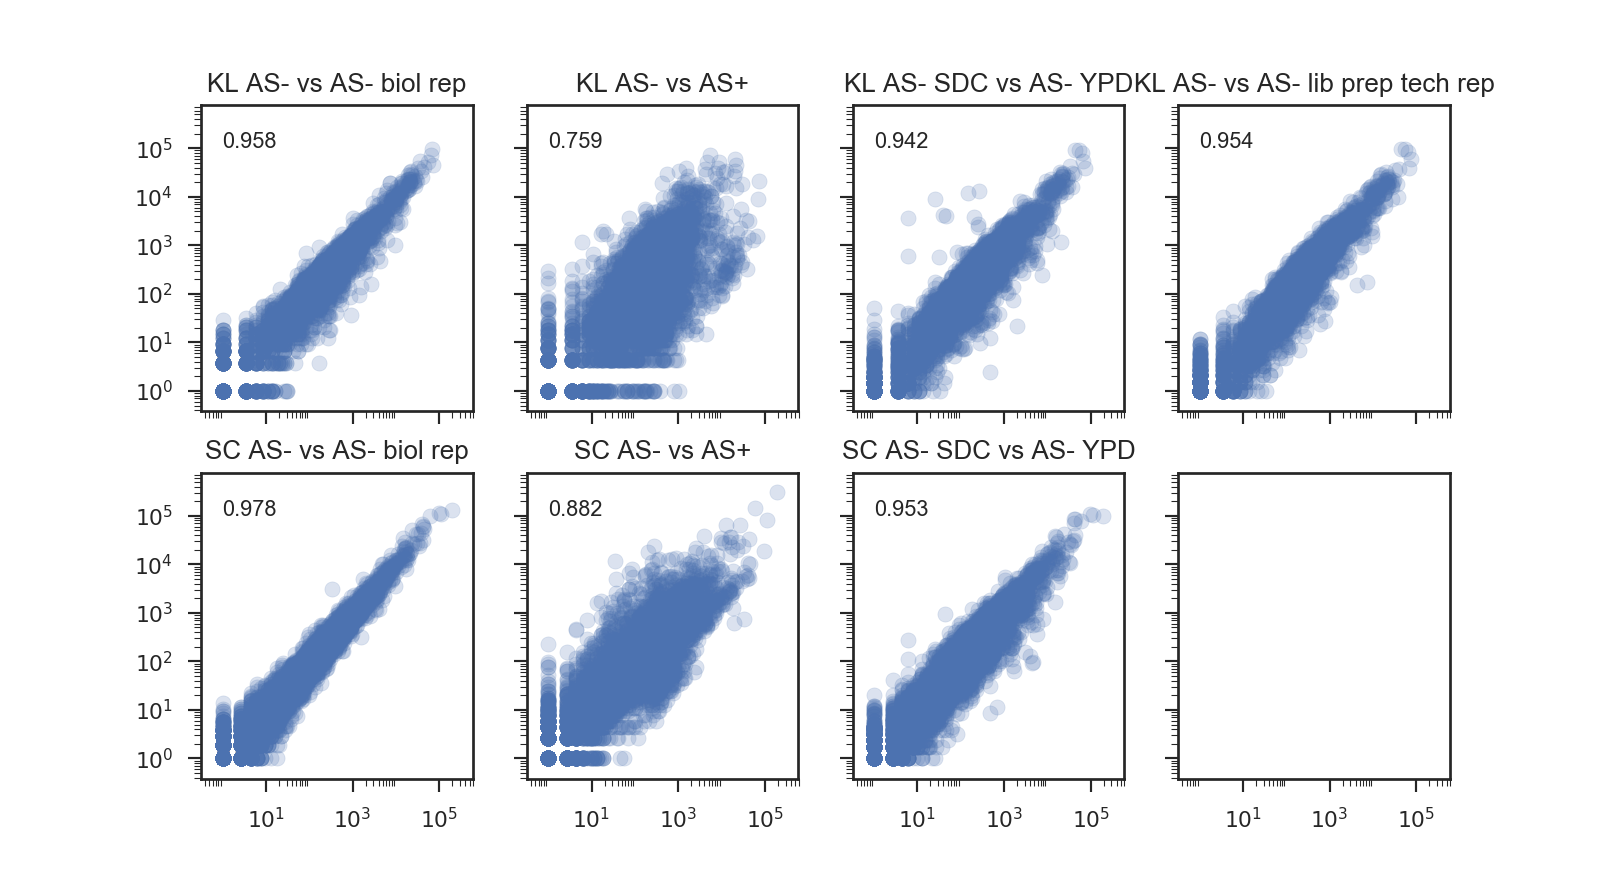

In [5]:
# Normalized scatter plots and correlation coefficients for 

pseudocount = 1.0

conditions = { 'KL': {
                  'AS- vs AS+': (7001,7002),
                  'AS- vs AS- lib prep tech rep': (7001,7051),
                  'AS- vs AS- biol rep': (7001,7005),
                  'AS- SDC vs AS- YPD': (7001,7025)
                     },
               'SC': {
                  'AS- vs AS+': (7009,7010),
                  'AS- vs AS- biol rep': (7009,7019),
                  'AS- SDC vs AS- YPD': (7009,7027)
                     }
              }

fig, axarr = plt.subplots(2,4, sharex = True, sharey = True)

for jj,spec in enumerate(conditions.keys()):
    
    for kk, key in enumerate(conditions[spec].keys()):
        labels = [str(label)+'_norm' for label in conditions[spec][key]]
        normcounts = counts[spec].loc[:,labels]  
        normcounts = normcounts + pseudocount
        normcounts_log = normcounts.apply(np.log10)
        corr_coeff = np.corrcoef(normcounts_log, rowvar=False)[0,1]

        ax = axarr[jj,kk]
        ax.scatter(normcounts.iloc[:,0],normcounts.iloc[:,1],alpha = 0.2,)
        ax.set_yscale('log')
        ax.set_xscale('log')
        ax.text(1,10e4, '{:0.3f}'.format(corr_coeff))
        #ax.axis('equal')
        ax.set_title(spec + " " + key)

#plt.tight_layout()




In [6]:
order = ['strain','NMPP1','media','time']
conditions = ['AS_noNMPP1_SDC_t40',
              'AS_yesNMPP1_SDC_t40',
              'WT_noNMPP1_SDC_t40',
              'WT_yesNMPP1_SDC_t40',
              'AS_noNMPP1_YPD_t40',
              'AS_yesNMPP1_YPD_t40',
              'AS_noNMPP1_SDC_t20',
              'AS_yesNMPP1_SDC_t20']


species = ['KL','SC']
pseudocount = 1.0

avg_expression_data_dict = {}

for spec in species: 
    
    avg_expression_data = pd.DataFrame()


    metadata_deseq[spec]
    metadata_spec = metadata_deseq[spec].copy()
    
    #remove sample 7051 from K.Lac metadata
    if spec == 'KL': 
        metadata_spec.drop(7051,inplace = True)
       
        
    for condition in conditions: 
        labels = metadata_spec.groupby(order).get_group(tuple(condition.split('_'))).index
        labels = [str(label)+'_norm' for label in labels]
        #print(condition + " " + spec + " " + str(labels))
        normcounts = counts[spec].loc[:,labels]  
        normcounts = normcounts + pseudocount
        normcounts_log = normcounts.apply(np.log10)
        avg_expression_data[condition + '_mean']=normcounts_log.mean(axis = 1)
        avg_expression_data[condition + '_var'] = normcounts_log.var(axis = 1)
    
    if spec == 'KL': 
        io_library.kl_genename_convert(avg_expression_data)  
    
    #write avg expression data to csv
    fname_avg_expression_data_spec = data_processing_dir + '20170817_klscpka/20170817_klscpka_avg_counts_' + spec + '.csv'
    avg_expression_data.to_csv(fname_avg_expression_data_spec)
    avg_expression_data_dict[spec] = avg_expression_data




In [7]:
#Check values for particular labels/genes
labels = ['7002','7002_norm','7006', '7006_norm','7040', '7040_norm','7022', '7022_norm', '7030', '7030_norm', '7044', '7044_norm','7001', '7001_norm', '7005', '7005_norm', '7039', '7039_norm']
counts['KL'].loc[:,labels].loc[['KLLA0_D05643g','KLLA0_D12540g']]

,7002,7002_norm,7006,7006_norm,7040,7040_norm,7022,7022_norm,7030,7030_norm,7044,7044_norm,7001,7001_norm,7005,7005_norm,7039,7039_norm
0,,,,,,,,,,,,,,,,,,
KLLA0_D05643g,333,1135.399214,1111,2840.139418,2013,2305.319921,8921,7177.769047,13101,9764.413484,8742,7402.596827,8598,21625.918699,7305,20323.176153,25422,21168.041494
KLLA0_D12540g,177,603.500483,248,633.982516,1114,1275.770686,10128,8148.912108,11808,8800.717077,8624,7302.676165,4956,12465.463255,3699,10290.955317,24400,20317.056583


In [8]:
#Import data from CSV: 
avg_expression_data_dict = {}

species = ['KL', 'SC']
for spec in species: 
    fname_avg_expression_data_spec = data_processing_dir + '20170817_klscpka/20170817_klscpka_avg_counts_' + spec + '.csv'
    avg_expression_data_dict[spec] = pd.read_csv(fname_avg_expression_data_spec,index_col = 0)


    

<IPython.core.display.Javascript object>


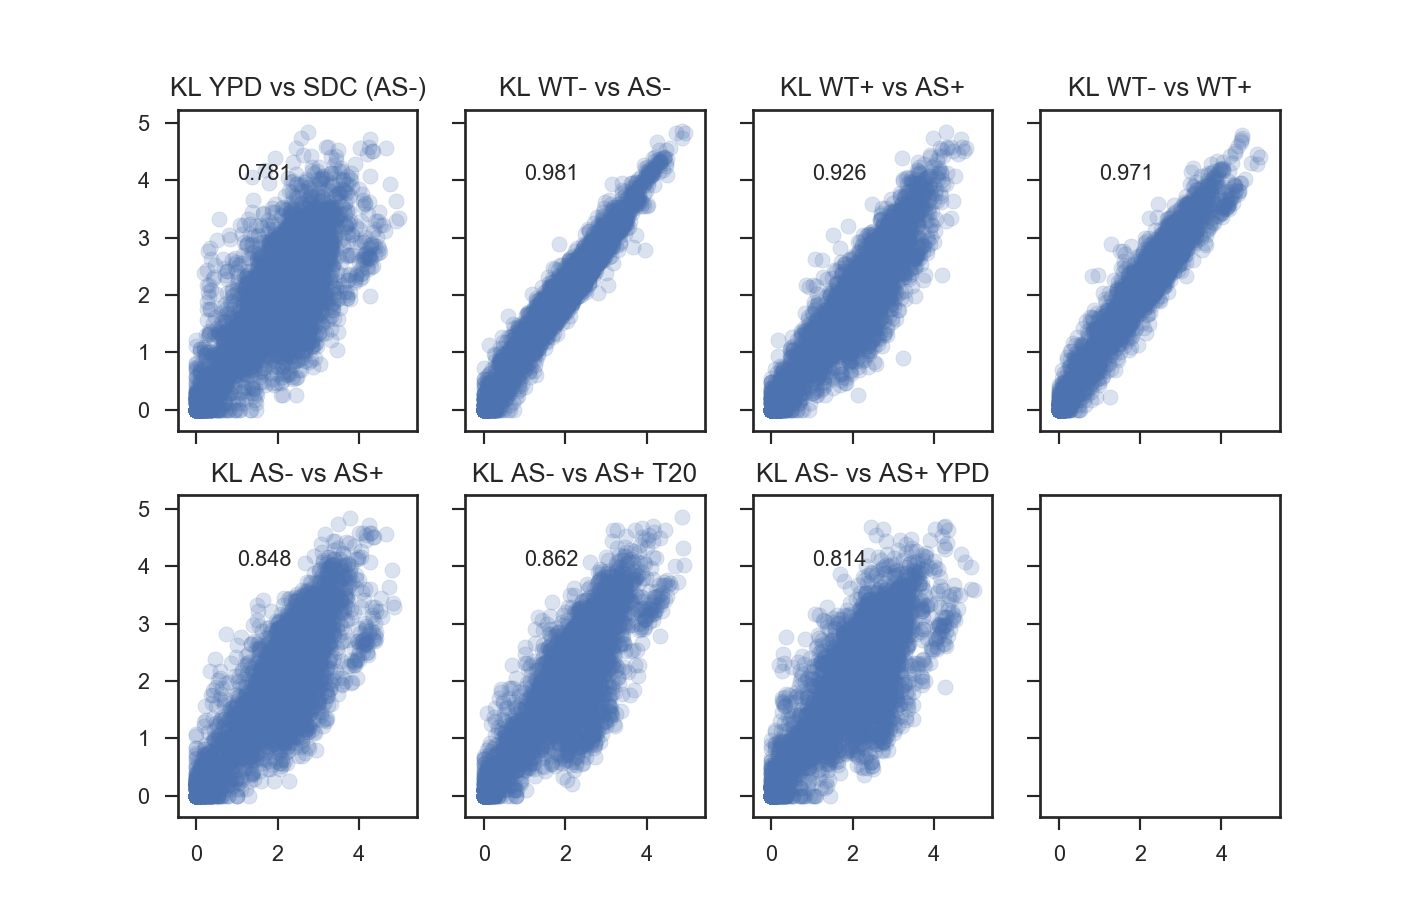

<IPython.core.display.Javascript object>


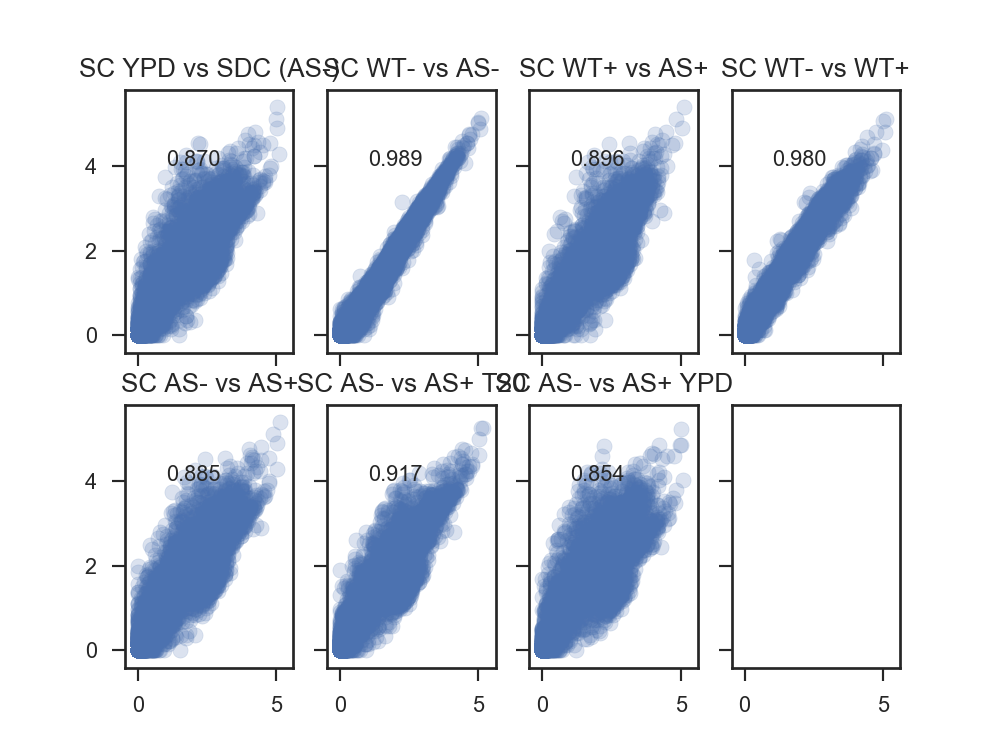

In [9]:
#Make scatter plots for various conditions

# SDC T40 WT- v.s. AS-   #Effect of strain
# SDC T40 WT- v.s. WT+   #Effect of drug
# SDC T40 WT+ v.s. AS+   #Good raw data
# SDC T40 AS- v.s. AS +  #Comparable to YPD approximate raw data
# YPD T40 AS- v.s. AS +  #wish I had WT+ in YPD but hoping it is not a big deal. 
# YPD T40 AS- v.s. SDC T40 AS- #effect of YPD.  Would like to know what the set of activated genes is for K.L.  


#For each species
species = ['KL', 'SC']

#order = ['strain','NMPP1','media','time']
conditions = {  'WT- vs AS-': ('WT_noNMPP1_SDC_t40','AS_noNMPP1_SDC_t40'),        #Effect of strain
                'WT- vs WT+': ('WT_noNMPP1_SDC_t40','WT_yesNMPP1_SDC_t40'),      #Effect of drug
                'WT+ vs AS+': ('WT_yesNMPP1_SDC_t40','AS_yesNMPP1_SDC_t40'),      #Controlled effect of drug on AS strain
                'AS- vs AS+': ('AS_noNMPP1_SDC_t40','AS_yesNMPP1_SDC_t40'),       #Comparable to YPD approximate raw data
                'AS- vs AS+ YPD': ('AS_noNMPP1_YPD_t40','AS_yesNMPP1_YPD_t40'),   #wish I had WT+ in YPD but hoping it is not a big deal.
                'YPD vs SDC (AS-)': ('AS_noNMPP1_YPD_t40','AS_yesNMPP1_SDC_t40'), #effect of YPD.
                'AS- vs AS+ T20':  ('AS_noNMPP1_SDC_t20','AS_yesNMPP1_SDC_t20')   #t20
             }

for spec in species: 
    avg_expression_data = avg_expression_data_dict[spec]
    fig, axarr = plt.subplots(2,4, sharex = True, sharey = True)
    for jj, condition in enumerate(conditions.keys()):
        avgcounts_x = avg_expression_data[conditions[condition][0]+'_mean']
        avgcounts_y = avg_expression_data[conditions[condition][1]+'_mean']
        corr_coeff = np.corrcoef(avgcounts_x,avgcounts_y, rowvar=False)[0,1]

        ax = axarr.flatten()[jj]
        ax.scatter(avgcounts_x,avgcounts_y,alpha = 0.2,)
        ax.text(1,4, '{:0.3f}'.format(corr_coeff))
        #ax.axis('equal')
        ax.set_title(spec + " " + condition)







In [ ]:
#might want to look at genes that change expression in SDC v.s. YPD in a given species.   Should probably color by DESEQ P-Value and 
#plot onto the scatter plot. 

# #Make plotly plots for various conditions
# fig_data = [
#   		{
#   			'x': condition_set[condition]['PKA(AS)+1NMPP1_KL'], 
#         	'y': condition_set[condition]['PKA(AS)+1NMPP1_SC'], 
#         	'text': condition_set[condition]['SC_common_name'], 
#         	'mode': 'markers', 
#         	'name': condition} for condition in condition_set.keys()]
# fig = {
#     'data': fig_data,
#     'layout': {
#         'xaxis': {'title': 'KL LFC 4uM NMPP1'},
#         'yaxis': {'title': 'SC LFC 4uM NMPP1'}
#     }
# }

# # IPython notebook
# # py.iplot(fig, filename='pandas/multiple-scatter')

# py.iplot(fig, filename='sc_kl_scatter_sig_highlight_20170915_various_goterms')

# Data analysis for rlog data


In [3]:
#Load Rlog data
rlog_data = {}
species = ['KL', 'SC']
for spec in species: 
    fname_rlog_data = data_processing_dir + '20170817_klscpka/20170817_klscpka_rlog_' + spec + '.csv'
    rlog_data_spec = pd.read_csv(fname_rlog_data,index_col = 0)
    if spec == 'KL': 
        io_library.kl_genename_convert(rlog_data_spec)  
    rlog_data[spec] = rlog_data_spec



<IPython.core.display.Javascript object>


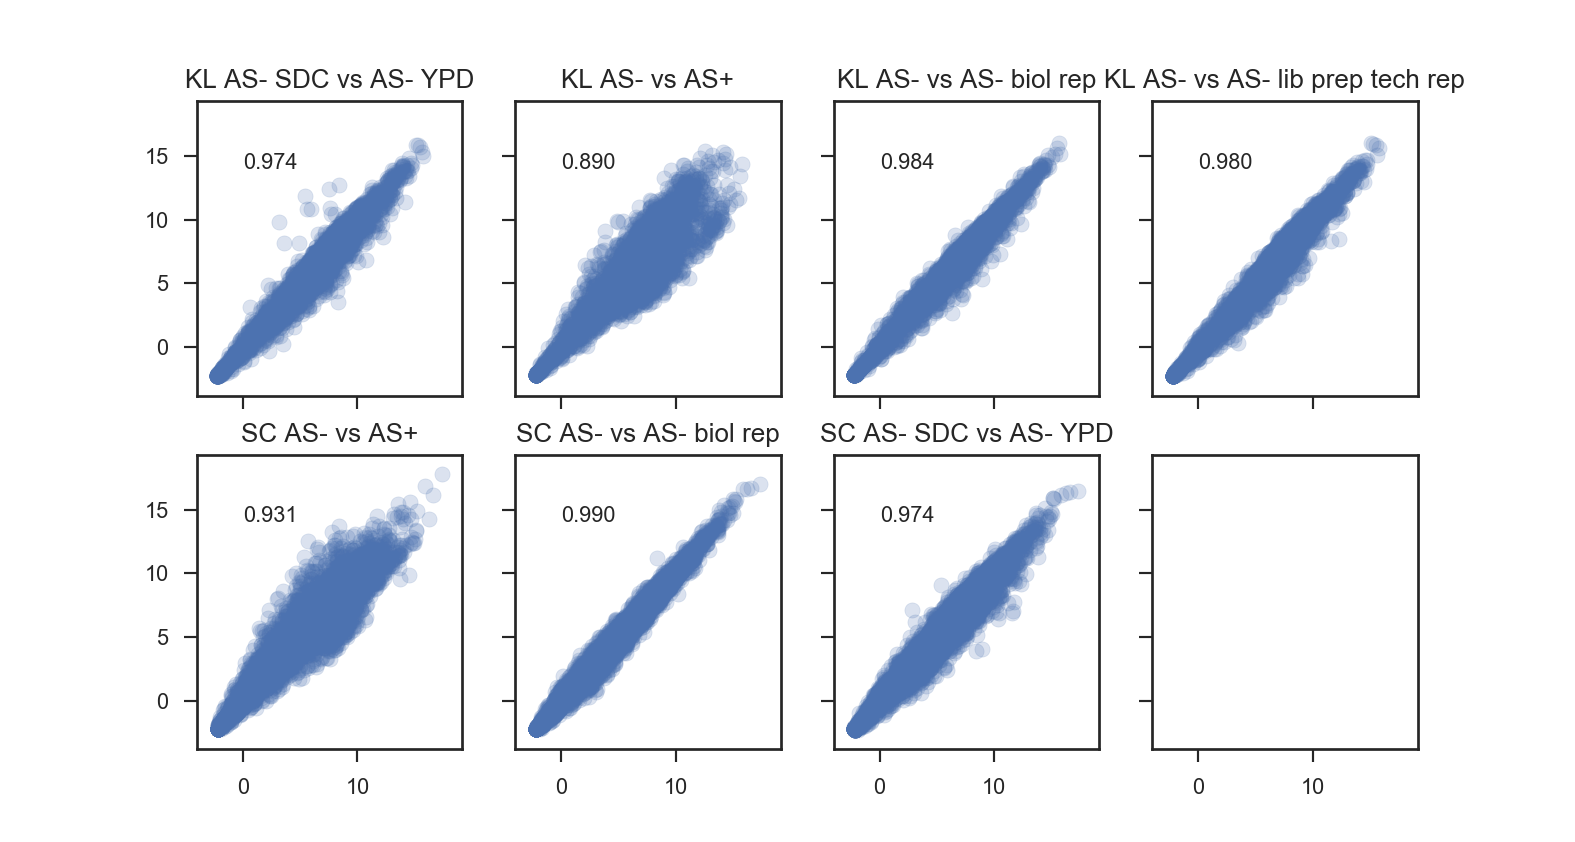

In [10]:

# Normalized scatter plots and correlation coefficients for 
conditions = { 'KL': {
                  'AS- vs AS+': (7001,7002),
                  'AS- vs AS- lib prep tech rep': (7001,7051),
                  'AS- vs AS- biol rep': (7001,7005),
                  'AS- SDC vs AS- YPD': (7001,7025)
                     },
               'SC': {
                  'AS- vs AS+': (7009,7010),
                  'AS- vs AS- biol rep': (7009,7019),
                  'AS- SDC vs AS- YPD': (7009,7027)
                     }
              }

fig, axarr = plt.subplots(2,4, sharex = True, sharey = True)

for jj,spec in enumerate(conditions.keys()):
    
    for kk, key in enumerate(conditions[spec].keys()):
        labels = [str(label) for label in conditions[spec][key]]
        rlog_subset = rlog_data[spec].loc[:,labels]  
        corr_coeff = np.corrcoef(rlog_subset, rowvar=False)[0,1]

        ax = axarr[jj,kk]
        ax.scatter(rlog_subset.iloc[:,0],rlog_subset.iloc[:,1],alpha = 0.2,)
        #ax.set_yscale('log')
        #ax.set_xscale('log')
        ax.text(0,14, '{:0.3f}'.format(corr_coeff))
        #ax.axis('equal')
        ax.set_title(spec + " " + key)


In [4]:
#Load Metadata
metadata_deseq = {}

species = ['KL', 'SC']

for spec in species: 
    fname_metadata_spec = data_processing_dir + '20170817_klscpka/20170817_klscpka_metadata_deseq_' + spec + '.csv'
    metadata_deseq[spec] = pd.read_csv(fname_metadata_spec, index_col = 0)


In [6]:
# Average comparisons for RLOG data

#First make average vector: 
order = ['strain','NMPP1','media','time']
conditions = ['AS_noNMPP1_SDC_t40',
              'AS_yesNMPP1_SDC_t40',
              'WT_noNMPP1_SDC_t40',
              'WT_yesNMPP1_SDC_t40',
              'AS_noNMPP1_YPD_t40',
              'AS_yesNMPP1_YPD_t40',
              'AS_noNMPP1_SDC_t20',
              'AS_yesNMPP1_SDC_t20']


species = ['KL','SC']

avg_rlog_data_dict = {}

for spec in species: 
    avg_rlog_data = pd.DataFrame()

    metadata_deseq[spec]
    metadata_spec = metadata_deseq[spec].copy()
    
    #remove sample 7051 from K.Lac metadata
    if spec == 'KL': 
        metadata_spec.drop(7051,inplace = True)
           
    for condition in conditions: 
        labels = metadata_spec.groupby(order).get_group(tuple(condition.split('_'))).index
        labels = [str(label) for label in labels]
        #print(condition + " " + spec + " " + str(labels))
        rlog_subset = rlog_data[spec].loc[:,labels]  
        avg_rlog_data[condition + '_mean']=rlog_subset.mean(axis = 1)
        avg_rlog_data[condition + '_var'] = rlog_subset.var(axis = 1)
        
    #write avg expression data to csv
    fname_avg_rlog_data_spec = data_processing_dir + '20170817_klscpka/20170817_klscpka_avg_rlog_' + spec + '.csv'
    avg_rlog_data.to_csv(fname_avg_rlog_data_spec)
    avg_rlog_data_dict[spec] = avg_rlog_data





In [9]:
#Import data from CSV: 
avg_rlog_data_dict = {}

species = ['KL', 'SC']
for spec in species: 
    fname_avg_rlog_data_spec = data_processing_dir + '20170817_klscpka/20170817_klscpka_avg_rlog_' + spec + '.csv'
    avg_rlog_data_dict[spec] = pd.read_csv(fname_avg_rlog_data_spec,index_col = 0)


  

<IPython.core.display.Javascript object>


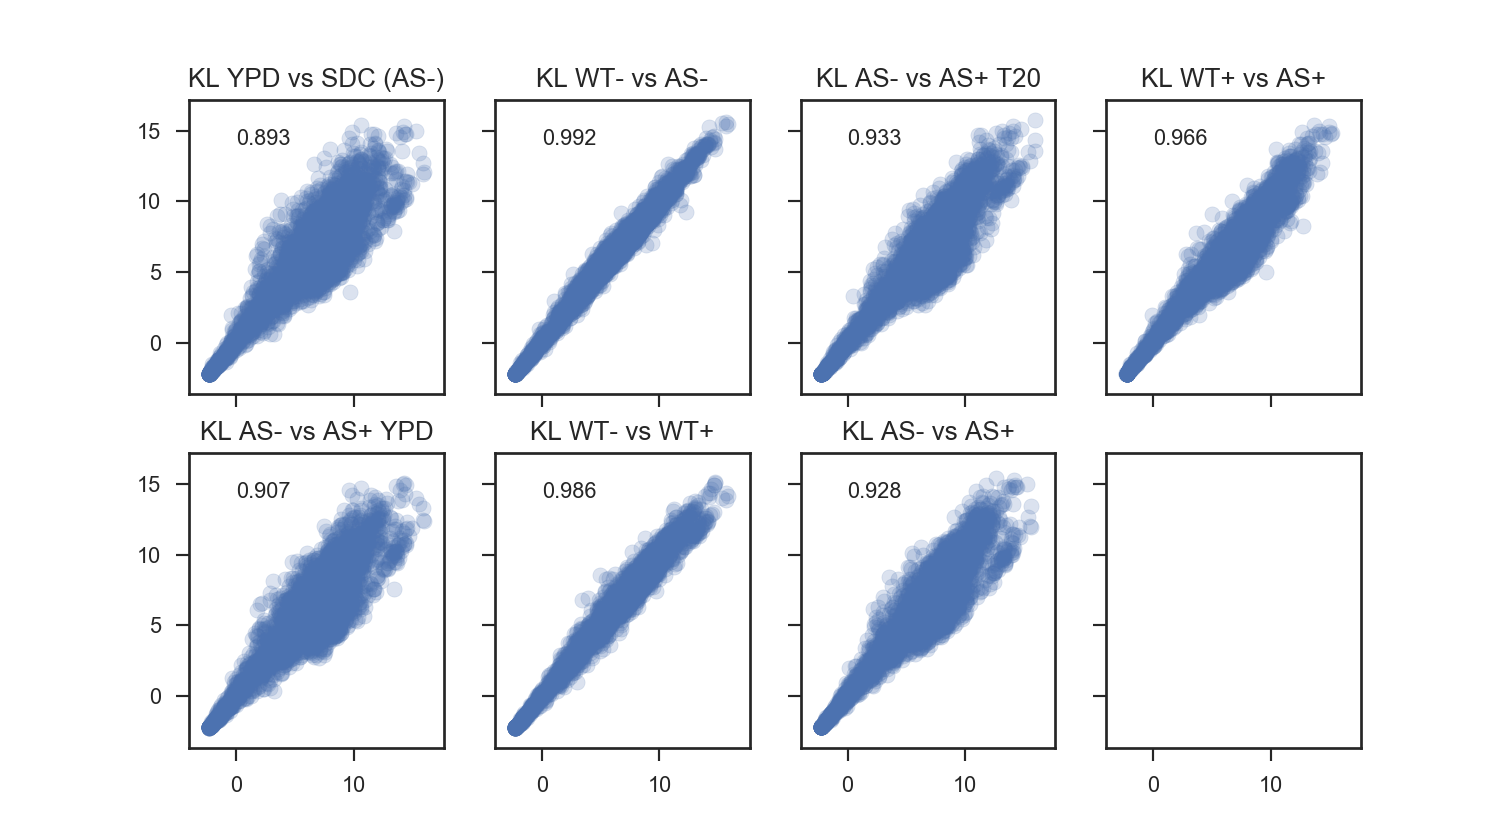

<IPython.core.display.Javascript object>


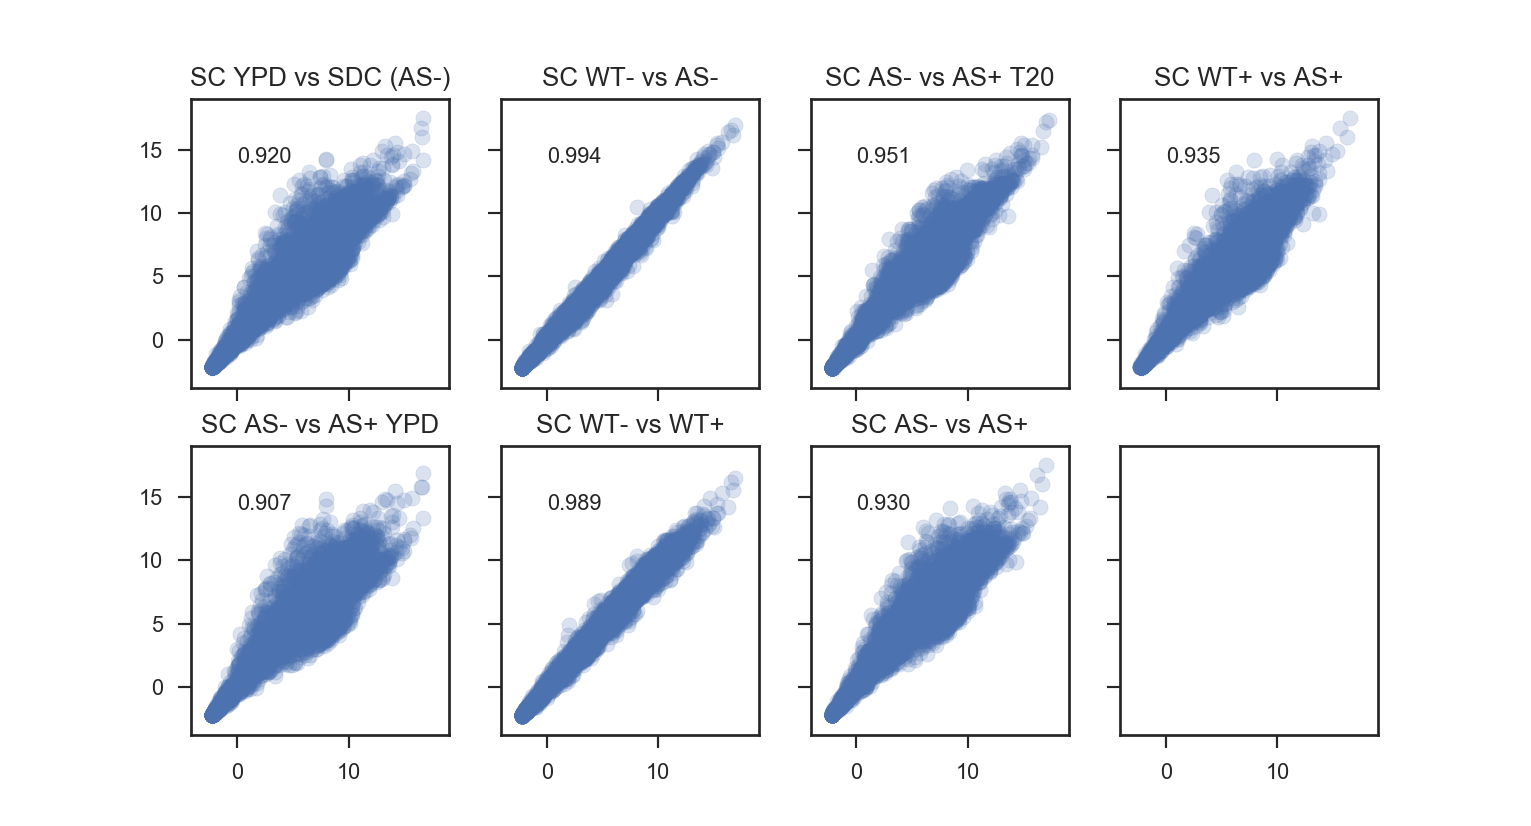

In [12]:
#Make scatter plots for various conditions

# SDC T40 WT- v.s. AS-   #Effect of strain
# SDC T40 WT- v.s. WT+   #Effect of drug
# SDC T40 WT+ v.s. AS+   #Good raw data
# SDC T40 AS- v.s. AS +  #Comparable to YPD approximate raw data
# YPD T40 AS- v.s. AS +  #wish I had WT+ in YPD but hoping it is not a big deal. 
# YPD T40 AS- v.s. SDC T40 AS- #effect of YPD.  Would like to know what the set of activated genes is for K.L.  


#For each species
species = ['KL', 'SC']

#order = ['strain','NMPP1','media','time']
conditions = {  'WT- vs AS-': ('WT_noNMPP1_SDC_t40','AS_noNMPP1_SDC_t40'),        #Effect of strain
                'WT- vs WT+': ('WT_noNMPP1_SDC_t40','WT_yesNMPP1_SDC_t40'),      #Effect of drug
                'WT+ vs AS+': ('WT_yesNMPP1_SDC_t40','AS_yesNMPP1_SDC_t40'),      #Controlled effect of drug on AS strain
                'AS- vs AS+': ('AS_noNMPP1_SDC_t40','AS_yesNMPP1_SDC_t40'),       #Comparable to YPD approximate raw data
                'AS- vs AS+ YPD': ('AS_noNMPP1_YPD_t40','AS_yesNMPP1_YPD_t40'),   #wish I had WT+ in YPD but hoping it is not a big deal.
                'YPD vs SDC (AS-)': ('AS_noNMPP1_YPD_t40','AS_yesNMPP1_SDC_t40'), #effect of YPD.
                'AS- vs AS+ T20':  ('AS_noNMPP1_SDC_t20','AS_yesNMPP1_SDC_t20')   #t20
             }

for spec in species: 
    avg_rlog_data = avg_rlog_data_dict[spec]
    fig, axarr = plt.subplots(2,4, sharex = True, sharey = True)
    for jj, condition in enumerate(conditions.keys()):
        avgcounts_x = avg_rlog_data[conditions[condition][0]+'_mean']
        avgcounts_y = avg_rlog_data[conditions[condition][1]+'_mean']
        corr_coeff = np.corrcoef(avgcounts_x,avgcounts_y, rowvar=False)[0,1]

        ax = axarr.flatten()[jj]
        ax.scatter(avgcounts_x,avgcounts_y,alpha = 0.2,)
        ax.text(0,14, '{:0.3f}'.format(corr_coeff))
        #ax.axis('equal')
        ax.set_title(spec + " " + condition)


In [10]:
rlog_data

NameError: name 'rlog_data' is not defined